## Introducción al aprendizaje supervisado

#### Actividades:  
1) Modificar la arquitectura de la red agregando/modificando las capas existentes.  
2) Modificar los parámetros trainSize y look_back.  
3) Modificar parámetros en métodos model.compile y model.fit.  
4) Agregar métrica adicional para avaluar resultados del entrenamiento.  
5) Analizar resultados para diferentes parámetros/arquitecturas testeadas.  

-------------------

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/users/lprone/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/lprone/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/lprone/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/lprone/anaconda3/lib/python3.7/site-packages/t

### Convert an array of values into a dataset matrix

In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

### Fix random seed for reproducibility

In [3]:
numpy.random.seed(7)

### Load the dataset

In [4]:
filePath = 'https://raw.githubusercontent.com/lprone/cuandoLlueve/master/Analisis%20y%20visualizacion/'+'rain.csv'
dataframe = pd.read_csv(filePath, usecols=[1], )
dataset = dataframe.values
dataset = dataset.astype('float32')

### Normalize the dataset

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### Split into train and test sets

In [6]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

### Reshape into X=t and Y=t+1

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

### Reshape input to be [samples, time steps, features]

In [8]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

TO-DO:
Modificar modelo, cantidad y tipo de capas  
Probar diferentes parámetros en compile

### Create LSTM network

In [9]:
model = Sequential()

model.add(LSTM(16, input_shape=(1, look_back)))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')

W0820 19:25:32.055190 140397131401024 deprecation_wrapper.py:119] From /users/lprone/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 19:25:32.067814 140397131401024 deprecation_wrapper.py:119] From /users/lprone/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 19:25:32.070002 140397131401024 deprecation_wrapper.py:119] From /users/lprone/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 19:25:32.244696 140397131401024 deprecation_wrapper.py:119] From /users/lprone/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Fit model

In [10]:
%%time

history = model.fit(trainX, trainY, validation_split=0.25, epochs=3, batch_size=1, verbose=2)

W0820 19:25:32.433783 140397131401024 deprecation.py:323] From /users/lprone/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 19:25:32.940115 140397131401024 deprecation_wrapper.py:119] From /users/lprone/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0820 19:25:33.014938 140397131401024 deprecation_wrapper.py:119] From /users/lprone/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 9018 samples, validate on 3007 samples
Epoch 1/3
 - 17s - loss: 0.0026 - val_loss: 0.0020
Epoch 2/3
 - 17s - loss: 0.0025 - val_loss: 0.0020
Epoch 3/3
 - 17s - loss: 0.0025 - val_loss: 0.0020
CPU times: user 2min 19s, sys: 28 s, total: 2min 47s
Wall time: 51.1 s


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


### Plot loss

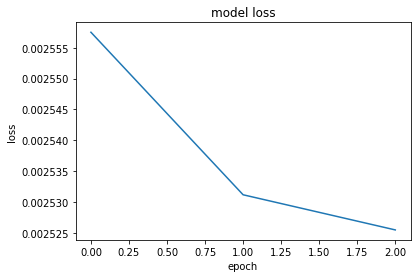

In [12]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Make predictions

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

### Invert predictions

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

### Calculate root mean squared error

In [15]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.94 RMSE
Test Score: 14.31 RMSE


### Shift train predictions for plotting

In [16]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

### Shift test predictions for plotting

In [17]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

### Plot baseline and predictions

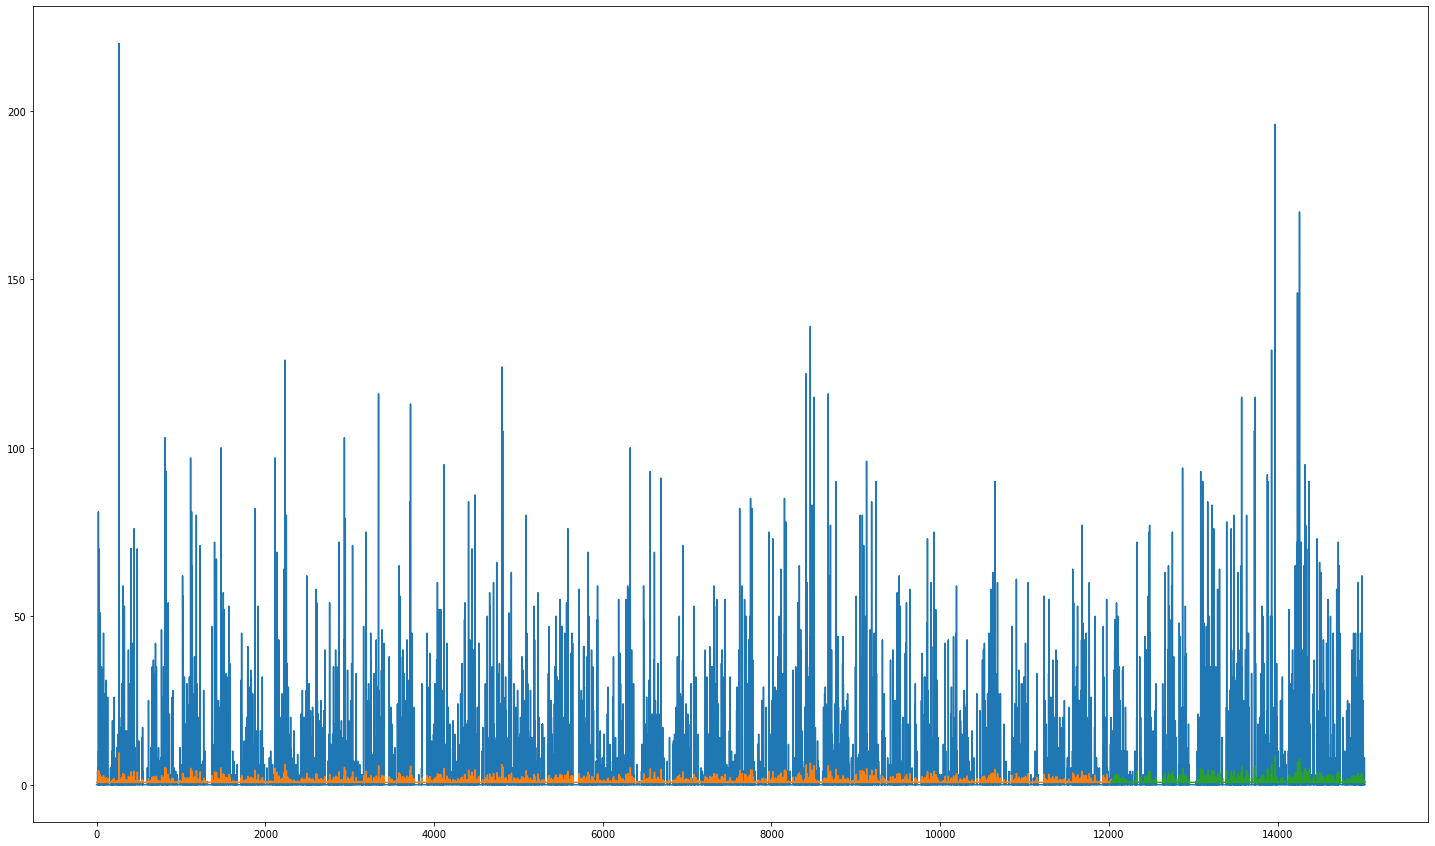

In [18]:
plt.figure(figsize=(25,15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()